In [8]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/climate_change_dataset.csv')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year', 'CO2 Emissions (Tons/Capita)'])

yearly_co2_avg = df.groupby('Year')['CO2 Emissions (Tons/Capita)'].mean()

sma_period = 5
sma_co2 = yearly_co2_avg.rolling(window=sma_period).mean()

sma_df = pd.DataFrame({
    'Average CO2 Emissions': yearly_co2_avg,
    f'{sma_period}-Year SMA': sma_co2
})


print(sma_df)

      Average CO2 Emissions  5-Year SMA
Year                                   
2000              11.224528         NaN
2001               9.929268         NaN
2002               9.933333         NaN
2003              11.085366         NaN
2004              10.000000   10.434499
2005               8.537838    9.897161
2006              10.497436   10.010795
2007              10.335000   10.091128
2008              10.375000    9.949055
2009              10.363636   10.021782
2010               9.873333   10.288881
2011               9.809091   10.151212
2012              10.640476   10.212307
2013              11.135484   10.364404
2014              11.409091   10.573495
2015               9.667442   10.532317
2016              10.398039   10.650106
2017               8.234375   10.168886
2018              10.443478   10.030485
2019               9.812500    9.711167
2020              10.246512    9.826981
2021              11.521739   10.051721
2022              12.326667   10.870179


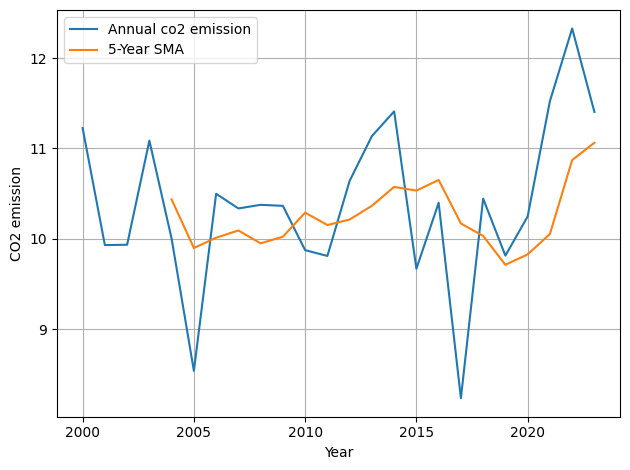

In [10]:
import matplotlib.pyplot as plt

sma_df = sma_df.reset_index()
plt.plot(sma_df['Year'], sma_df['Average CO2 Emissions'], label='Annual co2 emission')
plt.plot(sma_df['Year'], sma_df['5-Year SMA'], label='5-Year SMA')
plt.legend()
plt.xlabel('Year')
plt.ylabel('CO2 emission')
plt.grid(True)
plt.tight_layout()
plt.show()